In [2]:
# importing dataset
# identifying null values
# scaling
# removing correleation : pca , lda
# get dummnies for categorical or one-hot encoding
# lebeling y

# applying model

# SVC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("voice-classification.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.shape

(3168, 21)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [8]:
df[df["label"]=='male'].head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [9]:
print("shape of data : ",df.shape)
print("total labels : {} ".format(df.shape[0]))
print("number of males : {} ".format(df[df.label=='male'].shape[0]))
print("number of females : {} ".format(df[df.label=='female'].shape[0]))

shape of data :  (3168, 21)
total labels : 3168 
number of males : 1584 
number of females : 1584 


In [10]:
# x = df.iloc[:,:-1]

x = df.drop(['label'],axis = 1)
print(df.shape)
print(x.shape)

(3168, 21)
(3168, 20)


In [11]:
y = df[["label"]]

In [12]:
y.head()

,label
0,male
1,male
2,male
3,male
4,male


In [13]:
len(y)

3168

In [14]:
 # converting label column to 0,1 , label encoding

In [15]:
from sklearn.preprocessing  import LabelEncoder

In [16]:
gender_encoder= LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
gender_encoder.classes_

array(['female', 'male'], dtype=object)

In [18]:
print(y[0:5])

[1 1 1 1 1]


In [19]:
print(df["label"][0:5])
# or can also do df["label"].head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object


In [20]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 100)

In [26]:
# scalin
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
type(x_train)

pandas.core.frame.DataFrame

In [25]:
# train the model

In [1]:
from sklearn.svm import SVC

In [27]:
from sklearn.metrics import confusion_matrix as cm , accuracy_score as acs

In [28]:
svc_model = SVC()
# can use parameters as sv_model = SVC(kernel = 'poly' , degree = 2 or ' linear ' )

In [29]:
svc_model.fit(x_train,y_train)
y_tr_pred = svc_model.predict(x_train)

In [30]:
svc_model.n_features_in_

20

In [31]:
y_tr_pred[0:5]

array([1, 0, 0, 0, 0])

In [32]:
y_ts_pred = svc_model.predict(x_test)

In [33]:
y_ts_pred[0:5]

array([1, 1, 1, 0, 0])

In [34]:
# model evaluation

In [35]:
 # accuracy on training set

In [36]:
print('Accuracy score')
print(acs(y_pred = y_tr_pred,y_true = y_train))

Accuracy score
0.9869192602616148


In [37]:
print("cm for train set")
print(cm(y_pred = y_tr_pred,y_true = y_train))

cm for train set
[[1102   11]
 [  18 1086]]


In [38]:
# accuracy on test set

In [39]:
print('Accuracy score')
print(acs(y_pred = y_test,y_true = y_ts_pred))

Accuracy score
0.9737118822292324


In [40]:
print("confusion matrix")
print(cm(y_pred = y_test,y_true = y_ts_pred))

confusion matrix
[[458  12]
 [ 13 468]]


In [1]:
import pandas as pd
import numpy as np

x = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
y = np.array([1,1,2,2])

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),SVC(gamma='auto'))

clf.fit(x,y)

from sklearn.metrics import accuracy_score as acs

print(clf.predict([[-0.8,-1]]))

[1]


In [8]:
print(clf.predict([[2,-1]]))

[2]


In [41]:
from sklearn.tree import DecisionTreeClassifier as dtc , plot_tree

In [42]:
dtree = dtc()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_tree_pred = dtree.predict(x_test)

In [44]:
acs(y_pred = y_tree_pred,y_true = y_test)

0.9568874868559412

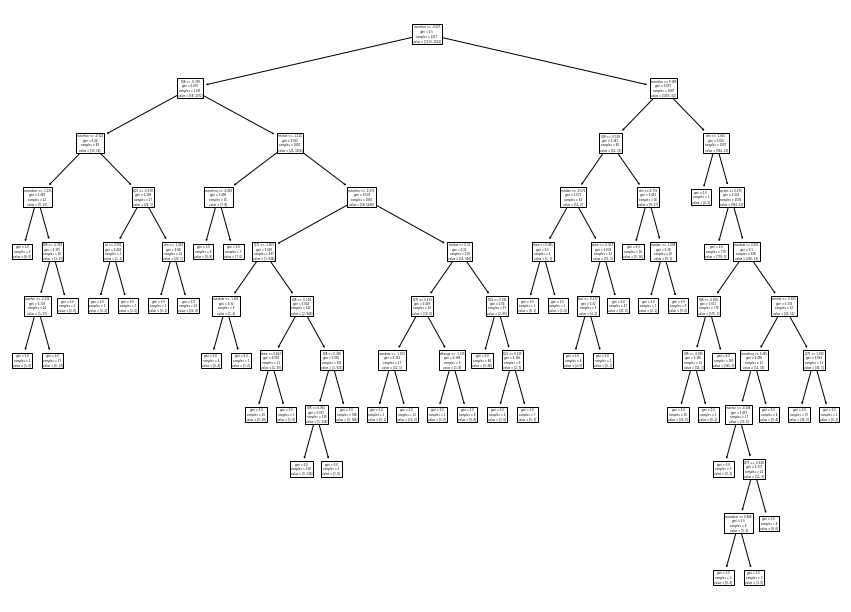

In [45]:
plt.figure(figsize=(15,11))
plot_tree(dtree,feature_names = x.columns)
plt.show()

# gridsearch

# manual

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'C':[0.1,1,10,100] , 'gamma' : [1,0.1,0.01,0.001,0.0001]}

In [48]:
model1 = SVC(C=0.1 , gamma = 1).fit(x_train,y_train)
print(acs(y_pred = model1.predict(x_test),y_true = y_test))

0.7066246056782335


In [49]:
model2 = SVC(C = 0.1 , gamma = 0.1).fit(x_train,y_train)
print(acs(y_pred = model2.predict(x_test) , y_true = y_test))

0.9621451104100947


In [50]:
accuracy = []
for c1 in [0.1,1,10,100] :
    for g1 in [1,0.1,0.01,0.001,0.0001] :
        model3 =  SVC(C=c1, gamma = g1).fit(x_train,y_train)
        accuracy.append(acs(y_pred = model3.predict(x_test),y_true = y_test))

In [51]:
print(accuracy)

[0.7066246056782335, 0.9621451104100947, 0.953732912723449, 0.8811777076761304, 0.4952681388012618, 0.964248159831756, 0.9737118822292324, 0.9663512092534174, 0.9526813880126183, 0.8853838065194533, 0.9652996845425867, 0.9831756046267087, 0.9726603575184016, 0.9652996845425867, 0.953732912723449, 0.9652996845425867, 0.9800210304942166, 0.9747634069400631, 0.9747634069400631, 0.9674027339642481]


# automatic

In [53]:
grid = GridSearchCV(SVC(),param_grid , refit = True , verbose = 2) 
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.2s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END .....................................C=0.1, gamma=1; total time=   1.2s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END .....................................C=0.1, gamma=1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.4s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.5s
[CV] END ..................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [54]:
grid_pred = grid.predict(x_test)

In [55]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'C': [0.1, 1, 10, 100],
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 2}

In [56]:
acs(y_pred = grid_pred, y_true = y_test)

0.9737118822292324

In [57]:
cm(y_pred = grid_pred, y_true = y_test)

array([[458,  13],
       [ 12, 468]], dtype=int64)

# unsupervised learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("zoo.csv")

In [60]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [62]:
data.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [63]:
data.shape

(101, 18)

In [64]:
data["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [65]:
data[data["class_type"] == 1].head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [33]:
features = data.drop(["animal_name","class_type"],axis = 1)

In [34]:
features.shape

(101, 16)

In [1]:
import scipy.cluster.hierarchy as sch

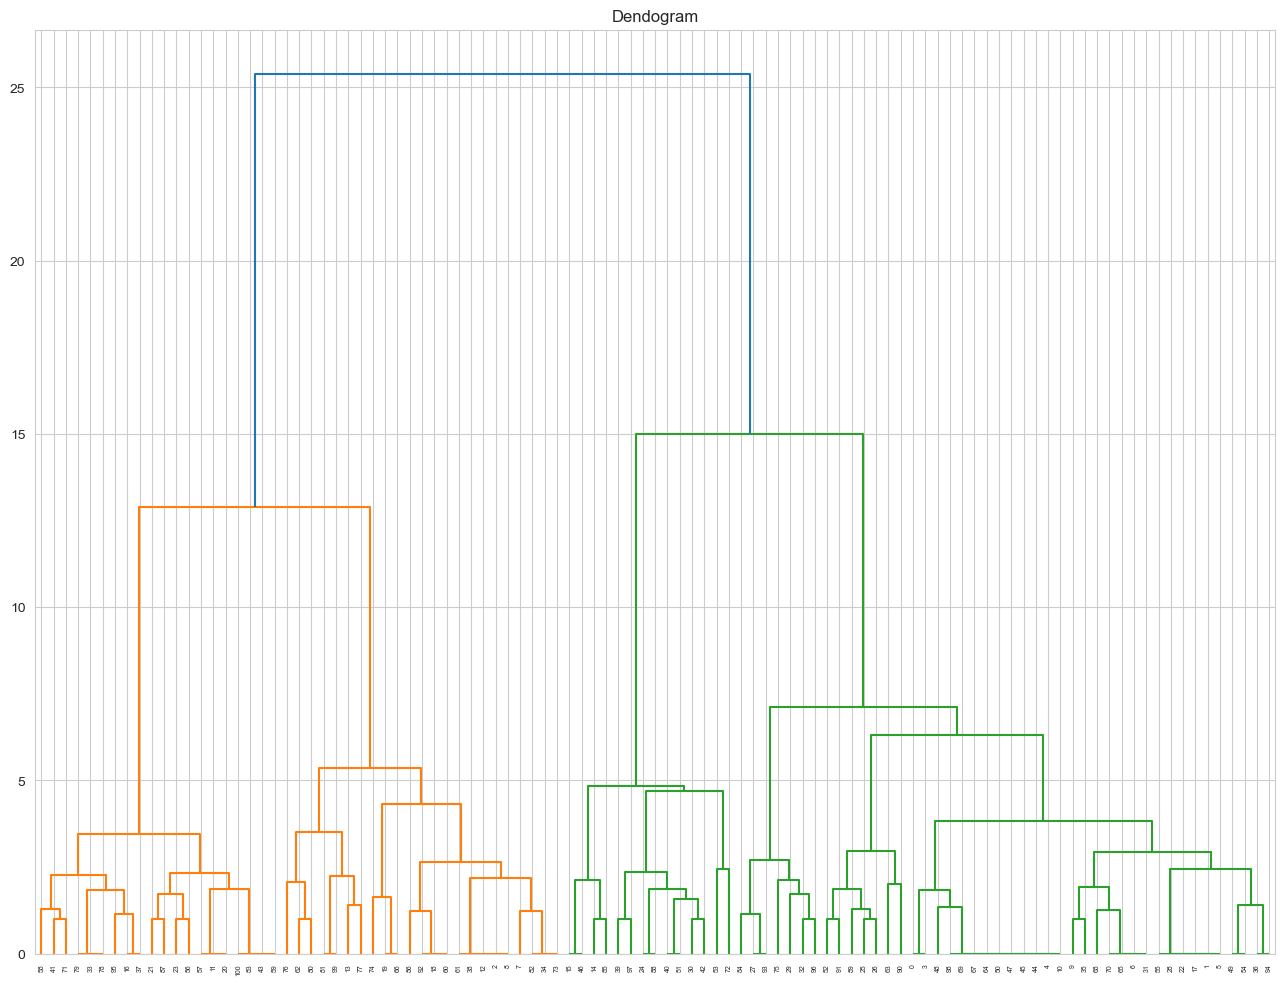

In [59]:
# clustering heavily depends on scaling
plt.figure(figsize=(16,12))
linkage_matrix = sch.ward(features)
sch.dendrogram(linkage_matrix)
plt.title("Dendogram")
plt.show()

In [37]:
data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [70]:
# clustering depends heavily on scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
model1 = AgglomerativeClustering(n_clusters = 7) 
# we can change no of clusters
model1.fit(features_scaled)

AgglomerativeClustering(n_clusters=7)

In [66]:
model1.labels_

array([2, 2, 4, 2, 2, 2, 5, 4, 4, 5, 2, 3, 4, 0, 0, 0, 3, 2, 4, 6, 3, 3,
       2, 3, 0, 1, 1, 2, 2, 5, 0, 5, 2, 3, 4, 5, 2, 3, 4, 0, 0, 3, 0, 3,
       2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 3, 4, 4, 1, 2, 2, 5,
       6, 2, 5, 2, 5, 3, 0, 4, 6, 6, 1, 1, 3, 3, 1, 0, 4, 3, 2, 0, 1, 3,
       0, 1, 3, 1, 4, 2, 2, 3, 2, 0, 2, 0, 3], dtype=int64)

In [76]:
data["clusters"] = model1.labels_

In [77]:
data[data["clusters"]==0]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,clusters
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7,0
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7,0
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,0
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,0
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,0
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,0
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,0
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6,0
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,0
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,0


In [78]:
data[data["clusters"]==1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,clusters
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5,1
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5,1
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5,1
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3,1
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3,1
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7,1
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3,1
86,stingray,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4,1
89,toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5,1
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3,1


In [79]:
data[data["clusters"]==2]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,clusters
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
22,elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
27,fruitbat,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,2
28,giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2


In [80]:
data[data["clusters"]==3]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,clusters
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,3
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,3
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,3
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2,3
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2,3
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,3
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,3
41,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2,3
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,3
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2,3


In [81]:
data.groupby(["clusters"]).sum()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
clusters,,,,,,,,,,,,,,,,,
0,4,0,16,0,6,5,8,0,0,11,3,0,85,1,1,1,111
1,0,0,9,0,0,7,9,9,9,7,5,1,20,6,0,1,43
2,29,0,1,29,2,2,16,28,29,29,0,0,106,26,0,22,29
3,0,20,21,0,16,6,9,0,21,21,0,0,44,21,3,7,43
4,0,0,12,0,0,12,8,12,12,0,0,12,0,12,1,3,48
5,8,0,0,8,0,0,2,8,8,8,0,0,30,6,8,6,8
6,2,0,0,4,0,4,4,4,4,4,0,4,2,3,0,4,4


In [82]:
data.clusters.value_counts()

2    29
3    21
0    17
4    12
1    10
5     8
6     4
Name: clusters, dtype: int64

# K-means clustering

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("driver-data.csv")

In [5]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [7]:
df.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,9))
sns.set_style("whitegrid")
sns.scatterplot("mean_dist_day","mean_over_speed_perc",data = df,palette = "deep")
plt.show()
# hue is like plt.legend()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [12]:
xscaled = scaler.fit_transform(df.iloc[:,1:])
# not runnning on ID column

In [13]:
from sklearn.cluster import KMeans

In [14]:
simplemodel = KMeans(n_clusters = 5)

In [15]:
simplemodel.fit(xscaled)

KMeans(n_clusters=5)

In [16]:
simple_cluster = simplemodel.predict(xscaled)

In [17]:
np.max(simple_cluster)

4

In [18]:
simple_cluster[1:10]

array([2, 2, 2, 2, 1, 2, 1, 3, 2])

In [19]:
simplemodel.inertia_

620.5442757104223

In [20]:
sse = {}
for k  in range(1,10) :
    model = KMeans(n_clusters = k)
    model.fit(xscaled)
    sse[k] = model.inertia_

In [21]:
sse

{1: 7999.999999999999,
 2: 3911.926390428411,
 3: 1756.5445821314258,
 4: 739.1534508645559,
 5: 619.4037594867996,
 6: 503.17737112713326,
 7: 438.5774313794889,
 8: 374.59762964319566,
 9: 337.05740682757926}

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

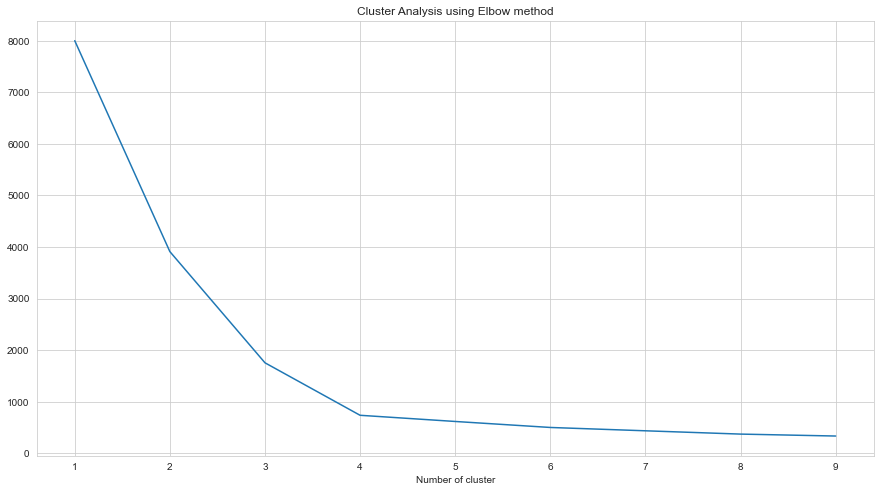

In [23]:
plt.figure(figsize = (15,8))
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.title("Cluster Analysis using Elbow method")
plt.show()

In [24]:
driver_model = KMeans(n_clusters = 4)
driver_model.fit(xscaled)

KMeans(n_clusters=4)

In [25]:
driver_model.cluster_centers_

array([[-0.48678423, -0.40249736],
       [ 1.95263225, -0.0139714 ],
       [ 1.90400473,  4.34582367],
       [-0.47952334,  1.57909169]])

In [26]:
driver_clusters = driver_model.predict(xscaled)

In [27]:
driver_clusters[0:10]

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 3])

In [28]:
df["clusters"] = driver_clusters

In [29]:
df.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
0,3423311935,71.24,28,3
1,3423313212,52.53,25,3
2,3423313724,64.54,27,3
3,3423311373,55.69,22,3
4,3423310999,54.58,25,3


In [30]:
df["clusters"].value_counts()

0    2774
1     695
3     427
2     104
Name: clusters, dtype: int64

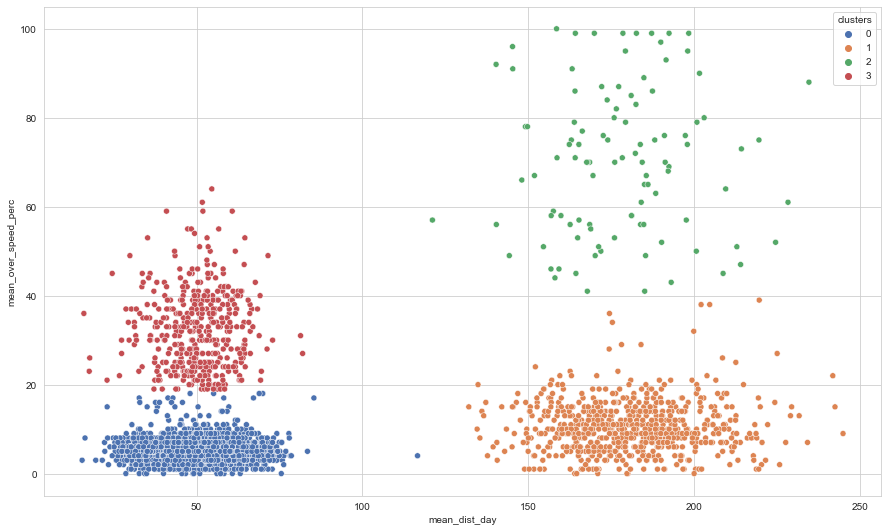

In [31]:
plt.figure(figsize = (15,9))
sns.set_style("whitegrid")
sns.scatterplot("mean_dist_day","mean_over_speed_perc",data = df,hue = "clusters",palette = "deep")
plt.show()
# hue is like plt.legend()

In [32]:
df[df["clusters"]==2].head()

,id,mean_dist_day,mean_over_speed_perc,clusters
3200,3423314190,179.22,95,2
3201,3423314144,192.34,69,2
3202,3423314442,140.25,92,2
3203,3423313001,184.28,70,2
3204,3423311047,200.58,50,2


# KMeans on tiger.png

# dog.jpeg